In [2]:
import numpy as np

In [1]:
a=5
b=10
a+b

15

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(a):
    return 3*a**2-4*a+5

In [21]:
x=np.arange(-5,5,0.25)
y=f(x)
f(y)
h=0.0001


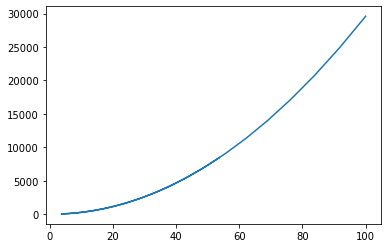

In [22]:
plt.plot(f(x),f(y))

In [26]:
a=5
b=-3
c=10
t=a*b+c
h=0.0001
c+=h
t2=a*b+c
print((t2-t)/h)

0.9999999999976694


In [57]:
import math
class Value:
    def __init__(self,data,_childern=(),_op='',label=''):
        self.data=data
        self._prev=set(_childern)
        self._op=_op
        self.label=label
        self.grad=0
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),'+')
    def __sub__(self,other):
        return Value(self.data-other.data,(self,other),'-')
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),'*')
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        return Value(t,(self,),'tanh')
  

In [58]:
a=Value(2.0)

In [59]:
a

Value(data=2.0)

In [60]:
b=Value(3.0)
a+b

Value(data=5.0)

In [61]:
print(a-b)
print(a*b)



Value(data=-1.0)
Value(data=6.0)


In [62]:
c=Value(5.0)
d=a*b+c


In [63]:
d._prev

{Value(data=5.0), Value(data=6.0)}

In [64]:
d._op

'+'

In [65]:
d

Value(data=11.0)

In [66]:
d.tanh()

Value(data=0.9999999994421064)

In [154]:
#inputs
x1=Value(5,label='x1')
x2=Value(0.25,label='x2')
#weights
w1=Value(-2.0,label='w1')
w2=Value(7.25,label='w2')
#bias
b=Value(6,label='b')
#cell of neuron before activation function
x1w1=x1*w1
x2w2=x2*w2
sofw=x1w1+x2w2
ab=sofw+b
#activationfunction

o=ab.tanh()
o.label='Out'

In [155]:
o

Value(data=-0.9751366982936283)

In [156]:
o.grad

0

In [157]:
o.grad=1

In [158]:
o.grad

1

In [159]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [160]:
ab.grad=1-o.data**2

In [161]:
ab.grad

0.04910841964100143

In [162]:
sofw.grad=0.0491
b.grad=0.0491

In [163]:
x1w1.grad=0.0491
x2w2.grad=0.0491

In [165]:
x1.grad=w1.data*x1w1.grad
w1.grad=x1.data*x1w1.grad
x2.grad=w2.data*x2w2.grad
w2.grad=x2.data*x2w2.grad

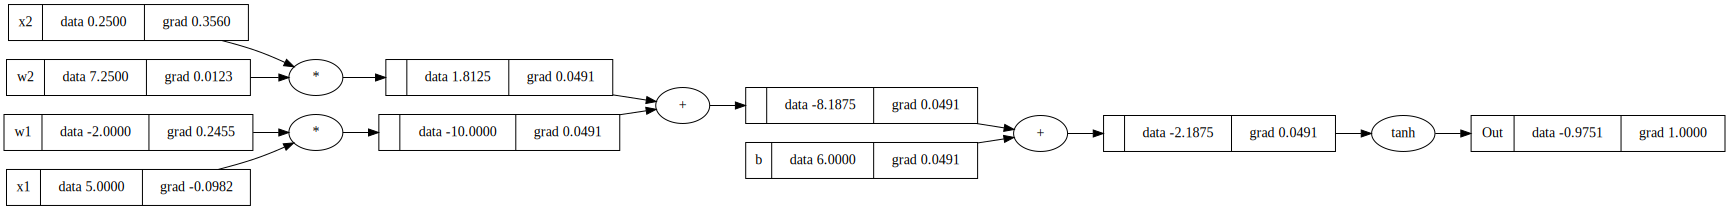

In [167]:
draw_dot(o)